In [1]:
!git clone https://github.com/Jsrsky/machine_unlearning_experiments
%cd machine_unlearning_experiments/experiments/mnist/sisa

Cloning into 'machine_unlearning_experiments'...
remote: Enumerating objects: 189, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 189 (delta 63), reused 153 (delta 44), pack-reused 0 (from 0)
Receiving objects: 100% (189/189), 26.58 MiB | 25.95 MiB/s, done.
Resolving deltas: 100% (63/63), done.
/kaggle/working/machine_unlearning_experiments/experiments/mnist/sisa


## Dependencies

In [2]:
import sys
import json
from pathlib import Path
from torchvision import datasets

## Utils

In [3]:
project_root = Path.cwd().resolve().parents[2]
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
    
data_root = project_root / 'data'
data_root.mkdir(parents=True, exist_ok=True)

from notebook_setup import setup_notebook
setup_notebook()

Notebook setup completed. Project root added to sys.path: /kaggle/working/machine_unlearning_experiments


In [4]:
# Device configuration
from utils.utils import DEVICE

print(f"Device used: {DEVICE}")

# Set random seed for reproducibility
from utils.utils import set_seed
set_seed()

# Init model
from models.simple_cnn import init_model_cnn

# Create sisa structure
from methods.sisa.sisa_utils import create_sisa_structure

# Recreate sisa dataloaders from json file
from methods.sisa.sisa_utils import recreate_sisa_dataloaders

# SISA train & test loop
from methods.sisa.sisa_train_test import sisa_train, sisa_test, retrain_sisa_framework

# Aggregate SISA models, via weighted voting
from methods.sisa.sisa_utils import evaluate_aggregated_model, update_sisa_structure


Device used: cuda


## Parameters (arbitrary chosen)

In [5]:
BATCH_SIZE = 32

LEARNING_RATE = 0.001

EPOCHS = 5

SHARDS = 3

SLICES = 5

# SISA structure

## Get data transform

In [6]:
*_, transform = init_model_cnn()
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

Init model...
Done initializing model.
Model ID: 136202634613264, Optimizer ID: 136199219180016, Criterion ID: 136199219180112


## Load dataset

In [7]:
train_dataset = datasets.MNIST(root=data_root, train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root=data_root, train=False, transform=transform, download=True)

## Create SISA structure

In [8]:
create_sisa_structure(train_dataset, shards=SHARDS, slices_per_shard=SLICES)

SISA structure saved to sisa_structure.json


In [9]:
sisa_structure_file = 'sisa_structure.json'

## Prepare DataLoaders from json file

In [10]:
dataloaders = recreate_sisa_dataloaders(
    datasets=(train_dataset, test_dataset),
    info_file_path=sisa_structure_file,
    batch_size=BATCH_SIZE,
    val_ratio=0.1
)

# Train using SISA framework

## Models output path

In [11]:
save_models_metrics_dir = './sisa_models'

## Call train

In [12]:
sisa_train(
    dataloaders=dataloaders, 
    num_epochs=EPOCHS, 
    save_models_metrics_dir=save_models_metrics_dir, 
    init_model_func=init_model_cnn,
    learning_rate=LEARNING_RATE,
    )

Training shard: shard_0
Init model...
Done initializing model.
Model ID: 136199219097664, Optimizer ID: 136199219095552, Criterion ID: 136199219095600
  Training slice: slice_0


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 170.14it/s]


Epoch [1/5], Train Loss: 0.8520, Train Accuracy: 0.7306, Val Loss: 0.3005, Val Accuracy: 0.9150
Epoch 1: New best validation accuracy: 0.9150. Model saved to ./sisa_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 174.24it/s]


Epoch [2/5], Train Loss: 0.1943, Train Accuracy: 0.9447, Val Loss: 0.2222, Val Accuracy: 0.9300
Epoch 2: New best validation accuracy: 0.9300. Model saved to ./sisa_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 174.42it/s]


Epoch [3/5], Train Loss: 0.1158, Train Accuracy: 0.9683, Val Loss: 0.1342, Val Accuracy: 0.9675
Epoch 3: New best validation accuracy: 0.9675. Model saved to ./sisa_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 173.27it/s]


Epoch [4/5], Train Loss: 0.0688, Train Accuracy: 0.9792, Val Loss: 0.1288, Val Accuracy: 0.9700
Epoch 4: New best validation accuracy: 0.9700. Model saved to ./sisa_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 175.41it/s]


Epoch [5/5], Train Loss: 0.0502, Train Accuracy: 0.9822, Val Loss: 0.1074, Val Accuracy: 0.9700
Training complete for ./sisa_models/shard_0_slice_0_CNN_MNIST. Training stats saved to './sisa_models/shard_0_slice_0_CNN_MNIST_history.json'.
  Training slice: slice_1


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 174.51it/s]


Epoch [1/5], Train Loss: 0.1203, Train Accuracy: 0.9642, Val Loss: 0.0816, Val Accuracy: 0.9725
Epoch 1: New best validation accuracy: 0.9725. Model saved to ./sisa_models/shard_0_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 155.70it/s]


Epoch [2/5], Train Loss: 0.0615, Train Accuracy: 0.9819, Val Loss: 0.0678, Val Accuracy: 0.9775
Epoch 2: New best validation accuracy: 0.9775. Model saved to ./sisa_models/shard_0_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 170.33it/s]


Epoch [3/5], Train Loss: 0.0392, Train Accuracy: 0.9878, Val Loss: 0.0734, Val Accuracy: 0.9775


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 167.82it/s]


Epoch [4/5], Train Loss: 0.0223, Train Accuracy: 0.9931, Val Loss: 0.0604, Val Accuracy: 0.9775


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 168.38it/s]


Epoch [5/5], Train Loss: 0.0108, Train Accuracy: 0.9981, Val Loss: 0.0630, Val Accuracy: 0.9725
Training complete for ./sisa_models/shard_0_slice_1_CNN_MNIST. Training stats saved to './sisa_models/shard_0_slice_1_CNN_MNIST_history.json'.
  Training slice: slice_2


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 169.81it/s]


Epoch [1/5], Train Loss: 0.1101, Train Accuracy: 0.9667, Val Loss: 0.0870, Val Accuracy: 0.9800
Epoch 1: New best validation accuracy: 0.9800. Model saved to ./sisa_models/shard_0_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 163.85it/s]


Epoch [2/5], Train Loss: 0.0417, Train Accuracy: 0.9875, Val Loss: 0.1117, Val Accuracy: 0.9625


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 179.27it/s]


Epoch [3/5], Train Loss: 0.0212, Train Accuracy: 0.9947, Val Loss: 0.0864, Val Accuracy: 0.9825
Epoch 3: New best validation accuracy: 0.9825. Model saved to ./sisa_models/shard_0_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 179.95it/s]


Epoch [4/5], Train Loss: 0.0085, Train Accuracy: 0.9972, Val Loss: 0.0833, Val Accuracy: 0.9800


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 181.44it/s]


Epoch [5/5], Train Loss: 0.0054, Train Accuracy: 0.9994, Val Loss: 0.0840, Val Accuracy: 0.9775
Training complete for ./sisa_models/shard_0_slice_2_CNN_MNIST. Training stats saved to './sisa_models/shard_0_slice_2_CNN_MNIST_history.json'.
  Training slice: slice_3


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 165.84it/s]


Epoch [1/5], Train Loss: 0.0764, Train Accuracy: 0.9747, Val Loss: 0.0779, Val Accuracy: 0.9650
Epoch 1: New best validation accuracy: 0.9650. Model saved to ./sisa_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 171.94it/s]


Epoch [2/5], Train Loss: 0.0262, Train Accuracy: 0.9928, Val Loss: 0.0462, Val Accuracy: 0.9800
Epoch 2: New best validation accuracy: 0.9800. Model saved to ./sisa_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 169.62it/s]


Epoch [3/5], Train Loss: 0.0123, Train Accuracy: 0.9958, Val Loss: 0.0418, Val Accuracy: 0.9800


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 180.99it/s]


Epoch [4/5], Train Loss: 0.0046, Train Accuracy: 0.9994, Val Loss: 0.0244, Val Accuracy: 0.9925
Epoch 4: New best validation accuracy: 0.9925. Model saved to ./sisa_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 178.82it/s]


Epoch [5/5], Train Loss: 0.0011, Train Accuracy: 1.0000, Val Loss: 0.0302, Val Accuracy: 0.9875
Training complete for ./sisa_models/shard_0_slice_3_CNN_MNIST. Training stats saved to './sisa_models/shard_0_slice_3_CNN_MNIST_history.json'.
  Training slice: slice_4


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 176.03it/s]


Epoch [1/5], Train Loss: 0.0868, Train Accuracy: 0.9756, Val Loss: 0.0585, Val Accuracy: 0.9875
Epoch 1: New best validation accuracy: 0.9875. Model saved to ./sisa_models/shard_0_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 177.80it/s]


Epoch [2/5], Train Loss: 0.0393, Train Accuracy: 0.9858, Val Loss: 0.0448, Val Accuracy: 0.9925
Epoch 2: New best validation accuracy: 0.9925. Model saved to ./sisa_models/shard_0_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 176.39it/s]


Epoch [3/5], Train Loss: 0.0147, Train Accuracy: 0.9961, Val Loss: 0.0694, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 171.17it/s]


Epoch [4/5], Train Loss: 0.0051, Train Accuracy: 0.9992, Val Loss: 0.0584, Val Accuracy: 0.9850


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 174.60it/s]


Epoch [5/5], Train Loss: 0.0026, Train Accuracy: 0.9997, Val Loss: 0.0491, Val Accuracy: 0.9925
Training complete for ./sisa_models/shard_0_slice_4_CNN_MNIST. Training stats saved to './sisa_models/shard_0_slice_4_CNN_MNIST_history.json'.
Saved final shard model to ./sisa_models/shard_0_final_model.pth
Training shard: shard_1
Init model...
Done initializing model.
Model ID: 136199219101600, Optimizer ID: 136199219220864, Criterion ID: 136199219220816
  Training slice: slice_0


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 165.69it/s]


Epoch [1/5], Train Loss: 0.7454, Train Accuracy: 0.7586, Val Loss: 0.2639, Val Accuracy: 0.9025
Epoch 1: New best validation accuracy: 0.9025. Model saved to ./sisa_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 176.37it/s]


Epoch [2/5], Train Loss: 0.1696, Train Accuracy: 0.9469, Val Loss: 0.1693, Val Accuracy: 0.9400
Epoch 2: New best validation accuracy: 0.9400. Model saved to ./sisa_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 170.31it/s]


Epoch [3/5], Train Loss: 0.1178, Train Accuracy: 0.9667, Val Loss: 0.1293, Val Accuracy: 0.9525
Epoch 3: New best validation accuracy: 0.9525. Model saved to ./sisa_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 172.21it/s]


Epoch [4/5], Train Loss: 0.0790, Train Accuracy: 0.9778, Val Loss: 0.1075, Val Accuracy: 0.9625
Epoch 4: New best validation accuracy: 0.9625. Model saved to ./sisa_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 179.04it/s]


Epoch [5/5], Train Loss: 0.0549, Train Accuracy: 0.9847, Val Loss: 0.1096, Val Accuracy: 0.9625
Training complete for ./sisa_models/shard_1_slice_0_CNN_MNIST. Training stats saved to './sisa_models/shard_1_slice_0_CNN_MNIST_history.json'.
  Training slice: slice_1


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 175.41it/s]


Epoch [1/5], Train Loss: 0.0984, Train Accuracy: 0.9686, Val Loss: 0.1033, Val Accuracy: 0.9625
Epoch 1: New best validation accuracy: 0.9625. Model saved to ./sisa_models/shard_1_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 176.70it/s]


Epoch [2/5], Train Loss: 0.0467, Train Accuracy: 0.9850, Val Loss: 0.1246, Val Accuracy: 0.9550


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 168.91it/s]


Epoch [3/5], Train Loss: 0.0281, Train Accuracy: 0.9919, Val Loss: 0.1146, Val Accuracy: 0.9525


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 172.37it/s]


Epoch [4/5], Train Loss: 0.0167, Train Accuracy: 0.9967, Val Loss: 0.1286, Val Accuracy: 0.9625


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 166.36it/s]


Epoch [5/5], Train Loss: 0.0167, Train Accuracy: 0.9947, Val Loss: 0.1174, Val Accuracy: 0.9625
Training complete for ./sisa_models/shard_1_slice_1_CNN_MNIST. Training stats saved to './sisa_models/shard_1_slice_1_CNN_MNIST_history.json'.
  Training slice: slice_2


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 178.25it/s]


Epoch [1/5], Train Loss: 0.0825, Train Accuracy: 0.9719, Val Loss: 0.1014, Val Accuracy: 0.9700
Epoch 1: New best validation accuracy: 0.9700. Model saved to ./sisa_models/shard_1_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 178.89it/s]


Epoch [2/5], Train Loss: 0.0400, Train Accuracy: 0.9844, Val Loss: 0.1199, Val Accuracy: 0.9675


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 175.11it/s]


Epoch [3/5], Train Loss: 0.0204, Train Accuracy: 0.9936, Val Loss: 0.0736, Val Accuracy: 0.9725
Epoch 3: New best validation accuracy: 0.9725. Model saved to ./sisa_models/shard_1_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 175.22it/s]


Epoch [4/5], Train Loss: 0.0075, Train Accuracy: 0.9989, Val Loss: 0.0595, Val Accuracy: 0.9800
Epoch 4: New best validation accuracy: 0.9800. Model saved to ./sisa_models/shard_1_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 170.34it/s]


Epoch [5/5], Train Loss: 0.0024, Train Accuracy: 0.9997, Val Loss: 0.0718, Val Accuracy: 0.9725
Training complete for ./sisa_models/shard_1_slice_2_CNN_MNIST. Training stats saved to './sisa_models/shard_1_slice_2_CNN_MNIST_history.json'.
  Training slice: slice_3


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 181.81it/s]


Epoch [1/5], Train Loss: 0.0925, Train Accuracy: 0.9722, Val Loss: 0.0649, Val Accuracy: 0.9750
Epoch 1: New best validation accuracy: 0.9750. Model saved to ./sisa_models/shard_1_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 167.48it/s]


Epoch [2/5], Train Loss: 0.0302, Train Accuracy: 0.9908, Val Loss: 0.0421, Val Accuracy: 0.9875
Epoch 2: New best validation accuracy: 0.9875. Model saved to ./sisa_models/shard_1_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 171.41it/s]


Epoch [3/5], Train Loss: 0.0104, Train Accuracy: 0.9972, Val Loss: 0.0459, Val Accuracy: 0.9875


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 176.39it/s]


Epoch [4/5], Train Loss: 0.0056, Train Accuracy: 0.9986, Val Loss: 0.0321, Val Accuracy: 0.9875


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 180.41it/s]


Epoch [5/5], Train Loss: 0.0026, Train Accuracy: 0.9989, Val Loss: 0.0333, Val Accuracy: 0.9925
Epoch 5: New best validation accuracy: 0.9925. Model saved to ./sisa_models/shard_1_slice_3_CNN_MNIST_model.pth.
Training complete for ./sisa_models/shard_1_slice_3_CNN_MNIST. Training stats saved to './sisa_models/shard_1_slice_3_CNN_MNIST_history.json'.
  Training slice: slice_4


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 174.64it/s]


Epoch [1/5], Train Loss: 0.0899, Train Accuracy: 0.9761, Val Loss: 0.1039, Val Accuracy: 0.9750
Epoch 1: New best validation accuracy: 0.9750. Model saved to ./sisa_models/shard_1_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 169.01it/s]


Epoch [2/5], Train Loss: 0.0295, Train Accuracy: 0.9889, Val Loss: 0.0846, Val Accuracy: 0.9775
Epoch 2: New best validation accuracy: 0.9775. Model saved to ./sisa_models/shard_1_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 175.53it/s]


Epoch [3/5], Train Loss: 0.0119, Train Accuracy: 0.9961, Val Loss: 0.1160, Val Accuracy: 0.9825
Epoch 3: New best validation accuracy: 0.9825. Model saved to ./sisa_models/shard_1_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 174.19it/s]


Epoch [4/5], Train Loss: 0.0028, Train Accuracy: 0.9997, Val Loss: 0.1053, Val Accuracy: 0.9850
Epoch 4: New best validation accuracy: 0.9850. Model saved to ./sisa_models/shard_1_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 176.19it/s]


Epoch [5/5], Train Loss: 0.0015, Train Accuracy: 0.9997, Val Loss: 0.1128, Val Accuracy: 0.9850
Training complete for ./sisa_models/shard_1_slice_4_CNN_MNIST. Training stats saved to './sisa_models/shard_1_slice_4_CNN_MNIST_history.json'.
Saved final shard model to ./sisa_models/shard_1_final_model.pth
Training shard: shard_2
Init model...
Done initializing model.
Model ID: 136199926229520, Optimizer ID: 136199219229072, Criterion ID: 136199219227056
  Training slice: slice_0


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 177.93it/s]


Epoch [1/5], Train Loss: 0.7854, Train Accuracy: 0.7503, Val Loss: 0.2673, Val Accuracy: 0.9300
Epoch 1: New best validation accuracy: 0.9300. Model saved to ./sisa_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 181.22it/s]


Epoch [2/5], Train Loss: 0.1863, Train Accuracy: 0.9436, Val Loss: 0.1930, Val Accuracy: 0.9375
Epoch 2: New best validation accuracy: 0.9375. Model saved to ./sisa_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 183.52it/s]


Epoch [3/5], Train Loss: 0.1156, Train Accuracy: 0.9661, Val Loss: 0.1561, Val Accuracy: 0.9475
Epoch 3: New best validation accuracy: 0.9475. Model saved to ./sisa_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 176.86it/s]


Epoch [4/5], Train Loss: 0.0759, Train Accuracy: 0.9767, Val Loss: 0.1392, Val Accuracy: 0.9550
Epoch 4: New best validation accuracy: 0.9550. Model saved to ./sisa_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 176.43it/s]


Epoch [5/5], Train Loss: 0.0527, Train Accuracy: 0.9836, Val Loss: 0.1137, Val Accuracy: 0.9650
Epoch 5: New best validation accuracy: 0.9650. Model saved to ./sisa_models/shard_2_slice_0_CNN_MNIST_model.pth.
Training complete for ./sisa_models/shard_2_slice_0_CNN_MNIST. Training stats saved to './sisa_models/shard_2_slice_0_CNN_MNIST_history.json'.
  Training slice: slice_1


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 168.36it/s]


Epoch [1/5], Train Loss: 0.1257, Train Accuracy: 0.9614, Val Loss: 0.1414, Val Accuracy: 0.9550
Epoch 1: New best validation accuracy: 0.9550. Model saved to ./sisa_models/shard_2_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 174.29it/s]


Epoch [2/5], Train Loss: 0.0671, Train Accuracy: 0.9792, Val Loss: 0.1195, Val Accuracy: 0.9575
Epoch 2: New best validation accuracy: 0.9575. Model saved to ./sisa_models/shard_2_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 176.63it/s]


Epoch [3/5], Train Loss: 0.0396, Train Accuracy: 0.9850, Val Loss: 0.1190, Val Accuracy: 0.9650
Epoch 3: New best validation accuracy: 0.9650. Model saved to ./sisa_models/shard_2_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 181.59it/s]


Epoch [4/5], Train Loss: 0.0196, Train Accuracy: 0.9942, Val Loss: 0.1776, Val Accuracy: 0.9625


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 174.79it/s]


Epoch [5/5], Train Loss: 0.0213, Train Accuracy: 0.9944, Val Loss: 0.1293, Val Accuracy: 0.9650
Training complete for ./sisa_models/shard_2_slice_1_CNN_MNIST. Training stats saved to './sisa_models/shard_2_slice_1_CNN_MNIST_history.json'.
  Training slice: slice_2


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 172.30it/s]


Epoch [1/5], Train Loss: 0.0904, Train Accuracy: 0.9725, Val Loss: 0.0996, Val Accuracy: 0.9650
Epoch 1: New best validation accuracy: 0.9650. Model saved to ./sisa_models/shard_2_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 171.94it/s]


Epoch [2/5], Train Loss: 0.0416, Train Accuracy: 0.9886, Val Loss: 0.0889, Val Accuracy: 0.9625


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 182.50it/s]


Epoch [3/5], Train Loss: 0.0180, Train Accuracy: 0.9942, Val Loss: 0.0813, Val Accuracy: 0.9750
Epoch 3: New best validation accuracy: 0.9750. Model saved to ./sisa_models/shard_2_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 141.68it/s]


Epoch [4/5], Train Loss: 0.0098, Train Accuracy: 0.9978, Val Loss: 0.0718, Val Accuracy: 0.9775
Epoch 4: New best validation accuracy: 0.9775. Model saved to ./sisa_models/shard_2_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 162.44it/s]


Epoch [5/5], Train Loss: 0.0038, Train Accuracy: 0.9997, Val Loss: 0.0713, Val Accuracy: 0.9750
Training complete for ./sisa_models/shard_2_slice_2_CNN_MNIST. Training stats saved to './sisa_models/shard_2_slice_2_CNN_MNIST_history.json'.
  Training slice: slice_3


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 161.61it/s]


Epoch [1/5], Train Loss: 0.0934, Train Accuracy: 0.9714, Val Loss: 0.0836, Val Accuracy: 0.9775
Epoch 1: New best validation accuracy: 0.9775. Model saved to ./sisa_models/shard_2_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 175.37it/s]


Epoch [2/5], Train Loss: 0.0320, Train Accuracy: 0.9883, Val Loss: 0.0804, Val Accuracy: 0.9750


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 172.75it/s]


Epoch [3/5], Train Loss: 0.0181, Train Accuracy: 0.9944, Val Loss: 0.0826, Val Accuracy: 0.9775


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 175.25it/s]


Epoch [4/5], Train Loss: 0.0098, Train Accuracy: 0.9972, Val Loss: 0.0795, Val Accuracy: 0.9775


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 171.39it/s]


Epoch [5/5], Train Loss: 0.0034, Train Accuracy: 0.9997, Val Loss: 0.0733, Val Accuracy: 0.9825
Epoch 5: New best validation accuracy: 0.9825. Model saved to ./sisa_models/shard_2_slice_3_CNN_MNIST_model.pth.
Training complete for ./sisa_models/shard_2_slice_3_CNN_MNIST. Training stats saved to './sisa_models/shard_2_slice_3_CNN_MNIST_history.json'.
  Training slice: slice_4


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 165.62it/s]


Epoch [1/5], Train Loss: 0.0716, Train Accuracy: 0.9767, Val Loss: 0.1006, Val Accuracy: 0.9700
Epoch 1: New best validation accuracy: 0.9700. Model saved to ./sisa_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 171.62it/s]


Epoch [2/5], Train Loss: 0.0213, Train Accuracy: 0.9928, Val Loss: 0.0615, Val Accuracy: 0.9750
Epoch 2: New best validation accuracy: 0.9750. Model saved to ./sisa_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 162.11it/s]


Epoch [3/5], Train Loss: 0.0170, Train Accuracy: 0.9942, Val Loss: 0.0422, Val Accuracy: 0.9875
Epoch 3: New best validation accuracy: 0.9875. Model saved to ./sisa_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 165.29it/s]


Epoch [4/5], Train Loss: 0.0083, Train Accuracy: 0.9981, Val Loss: 0.0453, Val Accuracy: 0.9875


Evaluating on validation set...: 100%|██████████| 13/13 [00:00<00:00, 180.81it/s]


Epoch [5/5], Train Loss: 0.0027, Train Accuracy: 0.9994, Val Loss: 0.0340, Val Accuracy: 0.9925
Epoch 5: New best validation accuracy: 0.9925. Model saved to ./sisa_models/shard_2_slice_4_CNN_MNIST_model.pth.
Training complete for ./sisa_models/shard_2_slice_4_CNN_MNIST. Training stats saved to './sisa_models/shard_2_slice_4_CNN_MNIST_history.json'.
Saved final shard model to ./sisa_models/shard_2_final_model.pth


## Call test

In [13]:
sisa_test(
    dataloaders=dataloaders, 
    saved_models_metrics_dir=save_models_metrics_dir, 
    init_model_func=init_model_cnn,
    clear_solo_models_preds=True)

Init model...
Done initializing model.
Model ID: 136199219218368, Optimizer ID: 136199219170992, Criterion ID: 136199219095696
Loading and testing model: ./sisa_models/shard_0_CNN_MNIST


Evaluating model: ./sisa_models/shard_0_final_model.pth: 100%|██████████| 313/313 [00:01<00:00, 170.34it/s]


Predictions and labels saved to ./sisa_models/shard_0_CNN_MNIST_predictions.json
Init model...
Done initializing model.
Model ID: 136199219229600, Optimizer ID: 136199219229072, Criterion ID: 136199219228592
Loading and testing model: ./sisa_models/shard_1_CNN_MNIST


Evaluating model: ./sisa_models/shard_1_final_model.pth: 100%|██████████| 313/313 [00:01<00:00, 166.94it/s]


Predictions and labels saved to ./sisa_models/shard_1_CNN_MNIST_predictions.json
Init model...
Done initializing model.
Model ID: 136199219179824, Optimizer ID: 136199219218080, Criterion ID: 136199219227008
Loading and testing model: ./sisa_models/shard_2_CNN_MNIST


Evaluating model: ./sisa_models/shard_2_final_model.pth: 100%|██████████| 313/313 [00:01<00:00, 168.04it/s]


Predictions and labels saved to ./sisa_models/shard_2_CNN_MNIST_predictions.json
Evaluation results saved to sisa_final_evaluation.json


## Shard models assembly (weighted voting, w=accuracy)

In [14]:
with open("sisa_final_evaluation.json", "r") as f:
    results = json.load(f)

Shard shard_0 Metrics:
  Accuracy: 0.9837
  Precision: 0.9839
  Recall: 0.9837
  F1 Score: 0.9837
Shard shard_1 Metrics:
  Accuracy: 0.9878
  Precision: 0.9878
  Recall: 0.9878
  F1 Score: 0.9878
Shard shard_2 Metrics:
  Accuracy: 0.9847
  Precision: 0.9847
  Recall: 0.9847
  F1 Score: 0.9847

Aggregated Model Metrics:
  Accuracy: 0.9882
  Precision: 0.9882
  Recall: 0.9882
  F1 Score: 0.9882


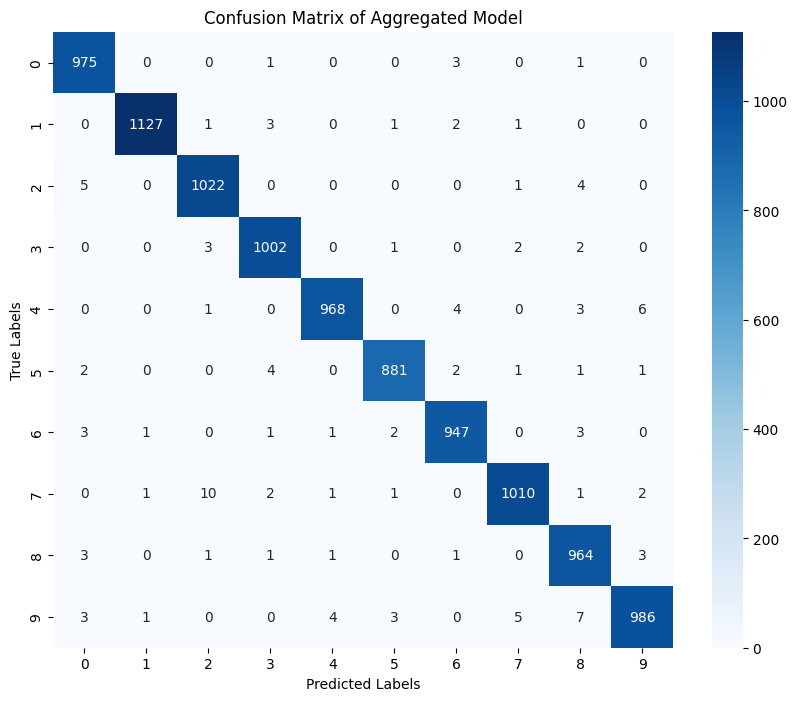

In [15]:
evaluate_aggregated_model(results)

# SISA re-train

## Paths to data info

In [16]:
mnist_samples_to_delete = 'mnist_samples_to_unlearn.json'
mnist_sisa_structure = 'sisa_structure.json'
updated_sisa_structure = 'updated_sisa_strucute.json'
deleted_samples = 'deleted_samples.json'

## Update sisa structure -> delete samples 

In [17]:
affected_shards = update_sisa_structure(mnist_samples_to_delete, mnist_sisa_structure, updated_sisa_structure,deleted_samples)

Retraining Plan:
  Shard: shard_0, Start from Slice: slice_0 onward
  Shard: shard_1, Start from Slice: slice_0 onward
  Shard: shard_2, Start from Slice: slice_0 onward


## Recreate DataLoaders from json file

In [18]:
dataloaders = recreate_sisa_dataloaders(
    datasets=(train_dataset, test_dataset),
    info_file_path=updated_sisa_structure,
    batch_size=BATCH_SIZE,
    val_ratio=0.1
)

## Models output path

In [19]:
save_path = "./sisa_updated_models"

## Retrain the affected shards

In [20]:
retrain_sisa_framework(
    dataloaders=dataloaders,
    affected_shards=affected_shards,
    num_epochs=EPOCHS,
    save_models_metrics_dir=save_path,
    init_model_func=init_model_cnn, 
    learning_rate=LEARNING_RATE
)

Retraining shard: shard_0
Init model...
Done initializing model.
Model ID: 136199219176176, Optimizer ID: 136199219174592, Criterion ID: 136199219176512
  Retraining slice: slice_0


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 175.20it/s]


Epoch [1/5], Train Loss: 0.8495, Train Accuracy: 0.7392, Val Loss: 0.3094, Val Accuracy: 0.9086
Epoch 1: New best validation accuracy: 0.9086. Model saved to ./sisa_updated_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 184.50it/s]


Epoch [2/5], Train Loss: 0.2162, Train Accuracy: 0.9379, Val Loss: 0.1574, Val Accuracy: 0.9640
Epoch 2: New best validation accuracy: 0.9640. Model saved to ./sisa_updated_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 184.68it/s]


Epoch [3/5], Train Loss: 0.1221, Train Accuracy: 0.9631, Val Loss: 0.1456, Val Accuracy: 0.9557


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 155.36it/s]


Epoch [4/5], Train Loss: 0.0741, Train Accuracy: 0.9785, Val Loss: 0.1589, Val Accuracy: 0.9557


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 180.13it/s]


Epoch [5/5], Train Loss: 0.0496, Train Accuracy: 0.9868, Val Loss: 0.1328, Val Accuracy: 0.9668
Epoch 5: New best validation accuracy: 0.9668. Model saved to ./sisa_updated_models/shard_0_slice_0_CNN_MNIST_model.pth.
Training complete for ./sisa_updated_models/shard_0_slice_0_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_0_slice_0_CNN_MNIST_history.json'.
  Retraining slice: slice_1


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 147.67it/s]


Epoch [1/5], Train Loss: 0.1247, Train Accuracy: 0.9606, Val Loss: 0.1035, Val Accuracy: 0.9667
Epoch 1: New best validation accuracy: 0.9667. Model saved to ./sisa_updated_models/shard_0_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 183.15it/s]


Epoch [2/5], Train Loss: 0.0606, Train Accuracy: 0.9806, Val Loss: 0.0663, Val Accuracy: 0.9694
Epoch 2: New best validation accuracy: 0.9694. Model saved to ./sisa_updated_models/shard_0_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 184.16it/s]


Epoch [3/5], Train Loss: 0.0351, Train Accuracy: 0.9880, Val Loss: 0.1049, Val Accuracy: 0.9639


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 185.06it/s]


Epoch [4/5], Train Loss: 0.0286, Train Accuracy: 0.9920, Val Loss: 0.0916, Val Accuracy: 0.9611


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 175.03it/s]


Epoch [5/5], Train Loss: 0.0165, Train Accuracy: 0.9941, Val Loss: 0.0970, Val Accuracy: 0.9778
Epoch 5: New best validation accuracy: 0.9778. Model saved to ./sisa_updated_models/shard_0_slice_1_CNN_MNIST_model.pth.
Training complete for ./sisa_updated_models/shard_0_slice_1_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_0_slice_1_CNN_MNIST_history.json'.
  Retraining slice: slice_2


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 179.61it/s]


Epoch [1/5], Train Loss: 0.1134, Train Accuracy: 0.9678, Val Loss: 0.1140, Val Accuracy: 0.9746
Epoch 1: New best validation accuracy: 0.9746. Model saved to ./sisa_updated_models/shard_0_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 182.35it/s]


Epoch [2/5], Train Loss: 0.0484, Train Accuracy: 0.9847, Val Loss: 0.0914, Val Accuracy: 0.9775
Epoch 2: New best validation accuracy: 0.9775. Model saved to ./sisa_updated_models/shard_0_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 181.21it/s]


Epoch [3/5], Train Loss: 0.0220, Train Accuracy: 0.9944, Val Loss: 0.1272, Val Accuracy: 0.9634


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 173.35it/s]


Epoch [4/5], Train Loss: 0.0115, Train Accuracy: 0.9963, Val Loss: 0.1108, Val Accuracy: 0.9746


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 182.68it/s]


Epoch [5/5], Train Loss: 0.0041, Train Accuracy: 0.9997, Val Loss: 0.1367, Val Accuracy: 0.9662
Training complete for ./sisa_updated_models/shard_0_slice_2_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_0_slice_2_CNN_MNIST_history.json'.
  Retraining slice: slice_3


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 162.83it/s]


Epoch [1/5], Train Loss: 0.0774, Train Accuracy: 0.9742, Val Loss: 0.0715, Val Accuracy: 0.9807
Epoch 1: New best validation accuracy: 0.9807. Model saved to ./sisa_updated_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 175.46it/s]


Epoch [2/5], Train Loss: 0.0416, Train Accuracy: 0.9850, Val Loss: 0.0385, Val Accuracy: 0.9779


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 178.50it/s]


Epoch [3/5], Train Loss: 0.0159, Train Accuracy: 0.9954, Val Loss: 0.0676, Val Accuracy: 0.9807


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 179.01it/s]


Epoch [4/5], Train Loss: 0.0057, Train Accuracy: 0.9988, Val Loss: 0.0342, Val Accuracy: 0.9890
Epoch 4: New best validation accuracy: 0.9890. Model saved to ./sisa_updated_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 180.13it/s]


Epoch [5/5], Train Loss: 0.0017, Train Accuracy: 1.0000, Val Loss: 0.0376, Val Accuracy: 0.9945
Epoch 5: New best validation accuracy: 0.9945. Model saved to ./sisa_updated_models/shard_0_slice_3_CNN_MNIST_model.pth.
Training complete for ./sisa_updated_models/shard_0_slice_3_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_0_slice_3_CNN_MNIST_history.json'.
  Retraining slice: slice_4


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 171.60it/s]


Epoch [1/5], Train Loss: 0.0752, Train Accuracy: 0.9782, Val Loss: 0.1089, Val Accuracy: 0.9586
Epoch 1: New best validation accuracy: 0.9586. Model saved to ./sisa_updated_models/shard_0_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 180.65it/s]


Epoch [2/5], Train Loss: 0.0365, Train Accuracy: 0.9880, Val Loss: 0.1053, Val Accuracy: 0.9724
Epoch 2: New best validation accuracy: 0.9724. Model saved to ./sisa_updated_models/shard_0_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 172.05it/s]


Epoch [3/5], Train Loss: 0.0139, Train Accuracy: 0.9960, Val Loss: 0.1044, Val Accuracy: 0.9807
Epoch 3: New best validation accuracy: 0.9807. Model saved to ./sisa_updated_models/shard_0_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 173.68it/s]


Epoch [4/5], Train Loss: 0.0042, Train Accuracy: 0.9997, Val Loss: 0.0970, Val Accuracy: 0.9807


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 171.36it/s]


Epoch [5/5], Train Loss: 0.0063, Train Accuracy: 0.9975, Val Loss: 0.1120, Val Accuracy: 0.9696
Training complete for ./sisa_updated_models/shard_0_slice_4_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_0_slice_4_CNN_MNIST_history.json'.
Saved updated model for shard_0 to ./sisa_updated_models/shard_0_final_model.pth
Retraining shard: shard_1
Init model...
Done initializing model.
Model ID: 136199219171232, Optimizer ID: 136199085523584, Criterion ID: 136199085526320
  Retraining slice: slice_0


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 167.39it/s]


Epoch [1/5], Train Loss: 0.8677, Train Accuracy: 0.7323, Val Loss: 0.2837, Val Accuracy: 0.9213
Epoch 1: New best validation accuracy: 0.9213. Model saved to ./sisa_updated_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 180.79it/s]


Epoch [2/5], Train Loss: 0.2254, Train Accuracy: 0.9321, Val Loss: 0.1475, Val Accuracy: 0.9635
Epoch 2: New best validation accuracy: 0.9635. Model saved to ./sisa_updated_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 172.65it/s]


Epoch [3/5], Train Loss: 0.1295, Train Accuracy: 0.9611, Val Loss: 0.1225, Val Accuracy: 0.9551


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 166.16it/s]


Epoch [4/5], Train Loss: 0.0979, Train Accuracy: 0.9704, Val Loss: 0.1080, Val Accuracy: 0.9635


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 173.49it/s]


Epoch [5/5], Train Loss: 0.0673, Train Accuracy: 0.9788, Val Loss: 0.0943, Val Accuracy: 0.9747
Epoch 5: New best validation accuracy: 0.9747. Model saved to ./sisa_updated_models/shard_1_slice_0_CNN_MNIST_model.pth.
Training complete for ./sisa_updated_models/shard_1_slice_0_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_1_slice_0_CNN_MNIST_history.json'.
  Retraining slice: slice_1


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 171.88it/s]


Epoch [1/5], Train Loss: 0.1180, Train Accuracy: 0.9630, Val Loss: 0.1619, Val Accuracy: 0.9528
Epoch 1: New best validation accuracy: 0.9528. Model saved to ./sisa_updated_models/shard_1_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 174.77it/s]


Epoch [2/5], Train Loss: 0.0814, Train Accuracy: 0.9738, Val Loss: 0.1323, Val Accuracy: 0.9583
Epoch 2: New best validation accuracy: 0.9583. Model saved to ./sisa_updated_models/shard_1_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 169.21it/s]


Epoch [3/5], Train Loss: 0.0394, Train Accuracy: 0.9889, Val Loss: 0.0988, Val Accuracy: 0.9694
Epoch 3: New best validation accuracy: 0.9694. Model saved to ./sisa_updated_models/shard_1_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 174.39it/s]


Epoch [4/5], Train Loss: 0.0203, Train Accuracy: 0.9951, Val Loss: 0.1044, Val Accuracy: 0.9639


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 172.66it/s]


Epoch [5/5], Train Loss: 0.0119, Train Accuracy: 0.9981, Val Loss: 0.1168, Val Accuracy: 0.9750
Epoch 5: New best validation accuracy: 0.9750. Model saved to ./sisa_updated_models/shard_1_slice_1_CNN_MNIST_model.pth.
Training complete for ./sisa_updated_models/shard_1_slice_1_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_1_slice_1_CNN_MNIST_history.json'.
  Retraining slice: slice_2


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 169.20it/s]


Epoch [1/5], Train Loss: 0.1044, Train Accuracy: 0.9657, Val Loss: 0.0899, Val Accuracy: 0.9638
Epoch 1: New best validation accuracy: 0.9638. Model saved to ./sisa_updated_models/shard_1_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 162.76it/s]


Epoch [2/5], Train Loss: 0.0463, Train Accuracy: 0.9858, Val Loss: 0.0439, Val Accuracy: 0.9833
Epoch 2: New best validation accuracy: 0.9833. Model saved to ./sisa_updated_models/shard_1_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 176.20it/s]


Epoch [3/5], Train Loss: 0.0296, Train Accuracy: 0.9923, Val Loss: 0.0443, Val Accuracy: 0.9805


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 175.22it/s]


Epoch [4/5], Train Loss: 0.0105, Train Accuracy: 0.9981, Val Loss: 0.0361, Val Accuracy: 0.9889
Epoch 4: New best validation accuracy: 0.9889. Model saved to ./sisa_updated_models/shard_1_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 181.03it/s]


Epoch [5/5], Train Loss: 0.0077, Train Accuracy: 0.9981, Val Loss: 0.0284, Val Accuracy: 0.9916
Epoch 5: New best validation accuracy: 0.9916. Model saved to ./sisa_updated_models/shard_1_slice_2_CNN_MNIST_model.pth.
Training complete for ./sisa_updated_models/shard_1_slice_2_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_1_slice_2_CNN_MNIST_history.json'.
  Retraining slice: slice_3


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 173.88it/s]


Epoch [1/5], Train Loss: 0.0921, Train Accuracy: 0.9702, Val Loss: 0.0798, Val Accuracy: 0.9751
Epoch 1: New best validation accuracy: 0.9751. Model saved to ./sisa_updated_models/shard_1_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 162.94it/s]


Epoch [2/5], Train Loss: 0.0338, Train Accuracy: 0.9890, Val Loss: 0.0980, Val Accuracy: 0.9669


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 176.65it/s]


Epoch [3/5], Train Loss: 0.0151, Train Accuracy: 0.9960, Val Loss: 0.0798, Val Accuracy: 0.9724


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 171.53it/s]


Epoch [4/5], Train Loss: 0.0050, Train Accuracy: 0.9991, Val Loss: 0.0621, Val Accuracy: 0.9807
Epoch 4: New best validation accuracy: 0.9807. Model saved to ./sisa_updated_models/shard_1_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 158.31it/s]


Epoch [5/5], Train Loss: 0.0020, Train Accuracy: 0.9997, Val Loss: 0.0719, Val Accuracy: 0.9807
Training complete for ./sisa_updated_models/shard_1_slice_3_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_1_slice_3_CNN_MNIST_history.json'.
  Retraining slice: slice_4


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 168.60it/s]


Epoch [1/5], Train Loss: 0.1074, Train Accuracy: 0.9694, Val Loss: 0.1426, Val Accuracy: 0.9613
Epoch 1: New best validation accuracy: 0.9613. Model saved to ./sisa_updated_models/shard_1_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 173.26it/s]


Epoch [2/5], Train Loss: 0.1008, Train Accuracy: 0.9724, Val Loss: 0.0914, Val Accuracy: 0.9669
Epoch 2: New best validation accuracy: 0.9669. Model saved to ./sisa_updated_models/shard_1_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 167.09it/s]


Epoch [3/5], Train Loss: 0.0141, Train Accuracy: 0.9954, Val Loss: 0.1039, Val Accuracy: 0.9669


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 175.34it/s]


Epoch [4/5], Train Loss: 0.0075, Train Accuracy: 0.9985, Val Loss: 0.0981, Val Accuracy: 0.9669


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 180.19it/s]


Epoch [5/5], Train Loss: 0.0026, Train Accuracy: 0.9997, Val Loss: 0.1005, Val Accuracy: 0.9696
Epoch 5: New best validation accuracy: 0.9696. Model saved to ./sisa_updated_models/shard_1_slice_4_CNN_MNIST_model.pth.
Training complete for ./sisa_updated_models/shard_1_slice_4_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_1_slice_4_CNN_MNIST_history.json'.
Saved updated model for shard_1 to ./sisa_updated_models/shard_1_final_model.pth
Retraining shard: shard_2
Init model...
Done initializing model.
Model ID: 136199219101648, Optimizer ID: 136199219172480, Criterion ID: 136199219174688
  Retraining slice: slice_0


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 176.15it/s]


Epoch [1/5], Train Loss: 0.7798, Train Accuracy: 0.7513, Val Loss: 0.3342, Val Accuracy: 0.9076
Epoch 1: New best validation accuracy: 0.9076. Model saved to ./sisa_updated_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 182.10it/s]


Epoch [2/5], Train Loss: 0.1916, Train Accuracy: 0.9462, Val Loss: 0.1666, Val Accuracy: 0.9496
Epoch 2: New best validation accuracy: 0.9496. Model saved to ./sisa_updated_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 174.30it/s]


Epoch [3/5], Train Loss: 0.0980, Train Accuracy: 0.9705, Val Loss: 0.1568, Val Accuracy: 0.9524
Epoch 3: New best validation accuracy: 0.9524. Model saved to ./sisa_updated_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 187.67it/s]


Epoch [4/5], Train Loss: 0.0758, Train Accuracy: 0.9767, Val Loss: 0.1409, Val Accuracy: 0.9496


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 179.10it/s]


Epoch [5/5], Train Loss: 0.0543, Train Accuracy: 0.9835, Val Loss: 0.1253, Val Accuracy: 0.9580
Epoch 5: New best validation accuracy: 0.9580. Model saved to ./sisa_updated_models/shard_2_slice_0_CNN_MNIST_model.pth.
Training complete for ./sisa_updated_models/shard_2_slice_0_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_2_slice_0_CNN_MNIST_history.json'.
  Retraining slice: slice_1


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 183.22it/s]


Epoch [1/5], Train Loss: 0.1326, Train Accuracy: 0.9584, Val Loss: 0.0760, Val Accuracy: 0.9667
Epoch 1: New best validation accuracy: 0.9667. Model saved to ./sisa_updated_models/shard_2_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 183.07it/s]


Epoch [2/5], Train Loss: 0.0690, Train Accuracy: 0.9788, Val Loss: 0.0962, Val Accuracy: 0.9722
Epoch 2: New best validation accuracy: 0.9722. Model saved to ./sisa_updated_models/shard_2_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 167.89it/s]


Epoch [3/5], Train Loss: 0.0331, Train Accuracy: 0.9898, Val Loss: 0.0736, Val Accuracy: 0.9722


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 154.25it/s]


Epoch [4/5], Train Loss: 0.0153, Train Accuracy: 0.9960, Val Loss: 0.0752, Val Accuracy: 0.9806
Epoch 4: New best validation accuracy: 0.9806. Model saved to ./sisa_updated_models/shard_2_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 180.95it/s]


Epoch [5/5], Train Loss: 0.0075, Train Accuracy: 0.9985, Val Loss: 0.0780, Val Accuracy: 0.9750
Training complete for ./sisa_updated_models/shard_2_slice_1_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_2_slice_1_CNN_MNIST_history.json'.
  Retraining slice: slice_2


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 179.04it/s]


Epoch [1/5], Train Loss: 0.0924, Train Accuracy: 0.9697, Val Loss: 0.0836, Val Accuracy: 0.9638
Epoch 1: New best validation accuracy: 0.9638. Model saved to ./sisa_updated_models/shard_2_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 178.21it/s]


Epoch [2/5], Train Loss: 0.0414, Train Accuracy: 0.9855, Val Loss: 0.0838, Val Accuracy: 0.9749
Epoch 2: New best validation accuracy: 0.9749. Model saved to ./sisa_updated_models/shard_2_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 175.43it/s]


Epoch [3/5], Train Loss: 0.0190, Train Accuracy: 0.9944, Val Loss: 0.0756, Val Accuracy: 0.9777
Epoch 3: New best validation accuracy: 0.9777. Model saved to ./sisa_updated_models/shard_2_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 183.30it/s]


Epoch [4/5], Train Loss: 0.0129, Train Accuracy: 0.9963, Val Loss: 0.0765, Val Accuracy: 0.9694


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 180.19it/s]


Epoch [5/5], Train Loss: 0.0044, Train Accuracy: 0.9991, Val Loss: 0.0523, Val Accuracy: 0.9861
Epoch 5: New best validation accuracy: 0.9861. Model saved to ./sisa_updated_models/shard_2_slice_2_CNN_MNIST_model.pth.
Training complete for ./sisa_updated_models/shard_2_slice_2_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_2_slice_2_CNN_MNIST_history.json'.
  Retraining slice: slice_3


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 177.69it/s]


Epoch [1/5], Train Loss: 0.0870, Train Accuracy: 0.9752, Val Loss: 0.1254, Val Accuracy: 0.9693
Epoch 1: New best validation accuracy: 0.9693. Model saved to ./sisa_updated_models/shard_2_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 181.87it/s]


Epoch [2/5], Train Loss: 0.0295, Train Accuracy: 0.9919, Val Loss: 0.1151, Val Accuracy: 0.9749
Epoch 2: New best validation accuracy: 0.9749. Model saved to ./sisa_updated_models/shard_2_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 182.17it/s]


Epoch [3/5], Train Loss: 0.0080, Train Accuracy: 0.9984, Val Loss: 0.0940, Val Accuracy: 0.9749


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 164.72it/s]


Epoch [4/5], Train Loss: 0.0043, Train Accuracy: 0.9991, Val Loss: 0.1490, Val Accuracy: 0.9721


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 187.02it/s]


Epoch [5/5], Train Loss: 0.0011, Train Accuracy: 1.0000, Val Loss: 0.1536, Val Accuracy: 0.9749
Training complete for ./sisa_updated_models/shard_2_slice_3_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_2_slice_3_CNN_MNIST_history.json'.
  Retraining slice: slice_4


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 184.59it/s]


Epoch [1/5], Train Loss: 0.0775, Train Accuracy: 0.9751, Val Loss: 0.0617, Val Accuracy: 0.9751
Epoch 1: New best validation accuracy: 0.9751. Model saved to ./sisa_updated_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 179.26it/s]


Epoch [2/5], Train Loss: 0.0260, Train Accuracy: 0.9911, Val Loss: 0.0687, Val Accuracy: 0.9778
Epoch 2: New best validation accuracy: 0.9778. Model saved to ./sisa_updated_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 181.84it/s]


Epoch [3/5], Train Loss: 0.0134, Train Accuracy: 0.9963, Val Loss: 0.0411, Val Accuracy: 0.9889
Epoch 3: New best validation accuracy: 0.9889. Model saved to ./sisa_updated_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 180.48it/s]


Epoch [4/5], Train Loss: 0.0031, Train Accuracy: 0.9997, Val Loss: 0.0568, Val Accuracy: 0.9806


Evaluating on validation set...: 100%|██████████| 12/12 [00:00<00:00, 173.83it/s]

Epoch [5/5], Train Loss: 0.0009, Train Accuracy: 1.0000, Val Loss: 0.0390, Val Accuracy: 0.9861
Training complete for ./sisa_updated_models/shard_2_slice_4_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_2_slice_4_CNN_MNIST_history.json'.
Saved updated model for shard_2 to ./sisa_updated_models/shard_2_final_model.pth


## Re-test new SISA models

In [21]:
sisa_test(
    dataloaders=dataloaders, 
    saved_models_metrics_dir=save_path, 
    init_model_func=init_model_cnn,
    clear_solo_models_preds=True)

Init model...
Done initializing model.
Model ID: 136199084568208, Optimizer ID: 136199084564992, Criterion ID: 136199084566864
Loading and testing model: ./sisa_updated_models/shard_0_CNN_MNIST


Evaluating model: ./sisa_updated_models/shard_0_final_model.pth: 100%|██████████| 313/313 [00:01<00:00, 173.30it/s]


Predictions and labels saved to ./sisa_updated_models/shard_0_CNN_MNIST_predictions.json
Init model...
Done initializing model.
Model ID: 136198882941328, Optimizer ID: 136198882941232, Criterion ID: 136198882941184
Loading and testing model: ./sisa_updated_models/shard_1_CNN_MNIST


Evaluating model: ./sisa_updated_models/shard_1_final_model.pth: 100%|██████████| 313/313 [00:01<00:00, 160.16it/s]


Predictions and labels saved to ./sisa_updated_models/shard_1_CNN_MNIST_predictions.json
Init model...
Done initializing model.
Model ID: 136199219175984, Optimizer ID: 136198882942768, Criterion ID: 136198882942816
Loading and testing model: ./sisa_updated_models/shard_2_CNN_MNIST


Evaluating model: ./sisa_updated_models/shard_2_final_model.pth: 100%|██████████| 313/313 [00:01<00:00, 167.62it/s]


Predictions and labels saved to ./sisa_updated_models/shard_2_CNN_MNIST_predictions.json
Evaluation results saved to sisa_final_evaluation.json


## Shard models assembly (weighted voting, w=accuracy)

In [22]:
with open("sisa_final_evaluation.json", "r") as f:
    results = json.load(f)

Shard shard_0 Metrics:
  Accuracy: 0.9831
  Precision: 0.9832
  Recall: 0.9831
  F1 Score: 0.9831
Shard shard_1 Metrics:
  Accuracy: 0.9821
  Precision: 0.9823
  Recall: 0.9821
  F1 Score: 0.9821
Shard shard_2 Metrics:
  Accuracy: 0.9862
  Precision: 0.9862
  Recall: 0.9862
  F1 Score: 0.9862

Aggregated Model Metrics:
  Accuracy: 0.9875
  Precision: 0.9875
  Recall: 0.9875
  F1 Score: 0.9875


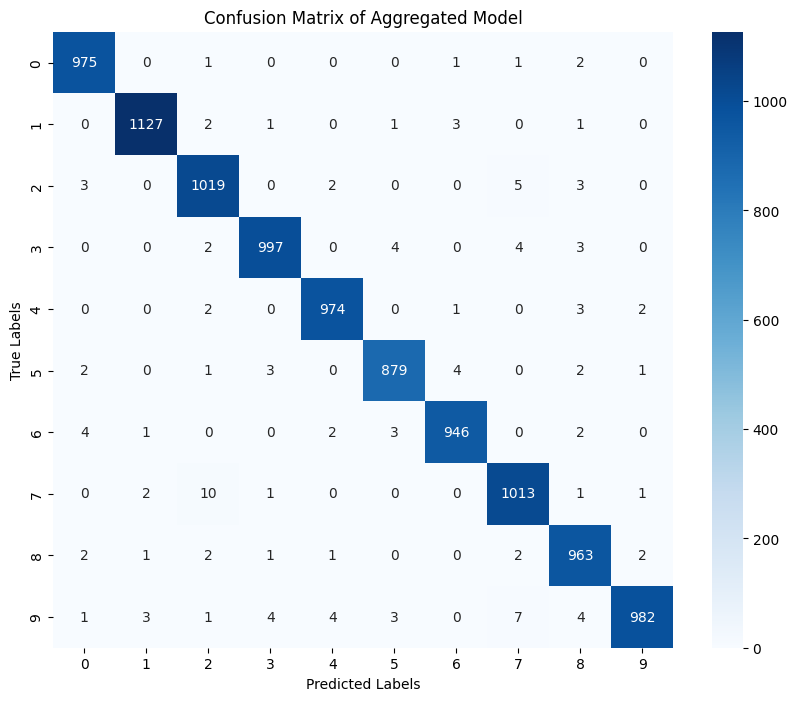

In [23]:
evaluate_aggregated_model(results)